In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# EDA Function

In [2]:
def visualize_change_heatmap(data, title, years=None):
    """
    Trực quan bằng Heatmap để có cái nhìn tổng quan giữa các quốc gia qua từng năm

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Filter data for heatmap
    heatmap_data = data.set_index("Country")[years]

    # Plot the heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".2f", 
        cmap="Blues", 
        linewidths=0.5, 
    )

    # Customize the plot
    plt.title(title, fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Country", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

In [3]:
def visualize_change_panel_bar_plot(data, title, show_value=True, years=None,):
    """
    Trực quan dữ liệu bằng Panel Bar Plot, so sánh sự khác biệt của các quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """


    if years is None:
        years = [col for col in data.columns if col.isdigit()]
        
    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)
    colors = sns.color_palette('Paired', len(years))
    one_year = True if len(years) == 1 else False
    
    for i, year in enumerate(years):
        value = data[year]
        value.index = data['Country']
        value = value.sort_values()[::-1]
        
        if one_year:
            bars = value.plot(kind='barh', stacked=True, ax=axs, color=colors[i])
            axs.set_ylabel("")
            axs.set_title(f"{year}")
            axs.grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs.spines[spine].set_visible(False)
            axs.tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
            break
        else:
            bars = value.plot(kind='barh', stacked=True, ax=axs[i], color=colors[i])
            axs[i].set_ylabel("")
            axs[i].set_title(f"{year}")
            axs[i].grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs[i].spines[spine].set_visible(False)
            axs[i].tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
                    
    plt.suptitle(title, fontsize=11)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [4]:
def visualize_change_stacked_bar_plot(data,  title, years=None):
    """
    Trực quan dữ liệu bằng Stacked Bar Plot, so sánh sự thay đổi của từng quốc gia qua các năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """


    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Filter the data for the selected countries
    country_list = data['Country']
    filtered_data = data[data['Country'].isin(country_list)]
    
    # Set the country names as the index
    filtered_data.set_index('Country', inplace=True)
    
    # Select only the years to be plotted
    values = filtered_data[years]
    
    # Plot the stacked bar chart
    values.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='Accent')
    
    # Customize the plot
    plt.title(title, fontsize=16)
    plt.ylabel("Indicator", fontsize=14)
    plt.xlabel("Country", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(title="Year", fontsize=12)
    plt.tight_layout()
    plt.show()

In [5]:
def top_k_countries_by_year(data, years=None, k=5):
    """
    Lấy ra top k quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]
    for year in years:
        if year not in data.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        top_k = data.sort_values(by=year, ascending=False).head(k)

        print(f"Top {k} countries for {year}:")
        for _, row in top_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [6]:
def bottom_k_countries_by_year(data, years=None, k=5):
    """
    Lấy ra bottom k quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]
    for year in years:
        if year not in data.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        bot_k = data.sort_values(by=year, ascending=True).head(k)

        print(f"Bottom {k} countries for {year}:")
        for _, row in bot_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [7]:
def visualize_top_bottom_k_line_plot(df, k,  years = None):
    """
    Biểu đồ đường trực quan k quốc gia có chỉ số cao nhất và thấp nhất dựa vào giá trị trung bình qua các năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
        k: Số nguyên k>0, số lượng quốc gia thể hiện trên chart
    """
    # Prepare data
    data = df.copy()
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Calculate averages
    data['Average'] = data[years].mean(axis=1)
    top_k = data.nlargest(k, 'Average')
    bottom_k = data.nsmallest(k, 'Average')

    # Identify extremes
    highest_country = data.nlargest(1, 'Average')
    lowest_country = data.nsmallest(1, 'Average')

    # Combine for visualization
    combined = pd.concat([top_k, bottom_k])

    # Setup plot aesthetics
    plt.figure(figsize=(14, 10), dpi=120)
    ax = plt.gca()

    # Plot each country's data
    for _, row in combined.iterrows():
        if row['Country'] in highest_country['Country'].values:
            color = "#2E86C1"  # Highlight color for highest country
            label = f"{row['Country']} (Highest)"
        elif row['Country'] in lowest_country['Country'].values:
            color = "#E74C3C"  # Highlight color for lowest country
            label = f"{row['Country']} (Lowest)"
        else:
            color = "#95A5A6"  # Neutral color for others
            label = row['Country']

        sns.lineplot(x=years, y=row[years].values, label=label, 
                     linewidth=2, color=color, marker='o', ax=ax)

        # Annotate the last year's point
        ax.text(years[-1], row[years].iloc[-1], f" {row['Country']}", 
                fontsize=10, fontweight='bold', color=color, ha='left', va='center')

    # Title and captions
    ax.set_title(f"Top-{k} and Bottom-{k} Countries with Focus on Extremes", 
                 fontsize=16, weight='bold', loc='left', color="#333333")
    ax.set_xlabel("Year", fontsize=12, color="#333333")
    ax.set_ylabel("Indicator Value", fontsize=12, color="#333333")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjust ticks and remove frame
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xticks(fontsize=10, color="#333333")
    plt.yticks(fontsize=10, color="#333333")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

    plt.tight_layout()
    plt.show()


In [8]:
def visualize_bubble_chart(df, title, years=None):
    # Filter the data for the specific indicator
    data = df.copy()
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Calculate the average value across the specified years
    data['Average'] = data[years].mean(axis=1)

    # Create a bubble chart for each year
    plt.figure(figsize=(14, 8))
    for year in years:
        plt.scatter(data['Country'], [year] * len(data), s=data[year] /10,
            alpha=0.6,
            label=f"{year}"
        )

    # Chart customization
    plt.title(title, fontsize=16)
    plt.xlabel("Country", fontsize=12)
    plt.ylabel("Year", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(alpha=0.6)
    plt.legend(title="Years", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()


Total Events by Year:
2018    512.0
2019    615.0
2020    643.0
2021    665.0
2022    555.0
dtype: float64


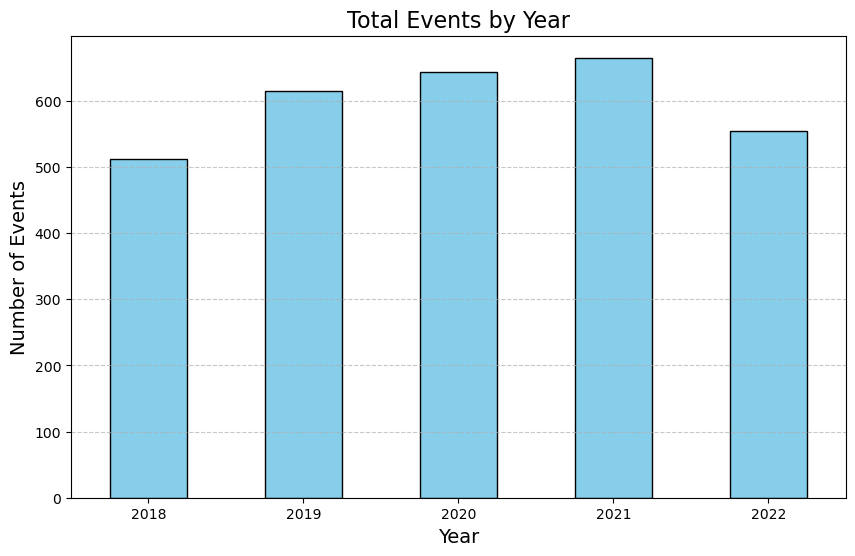

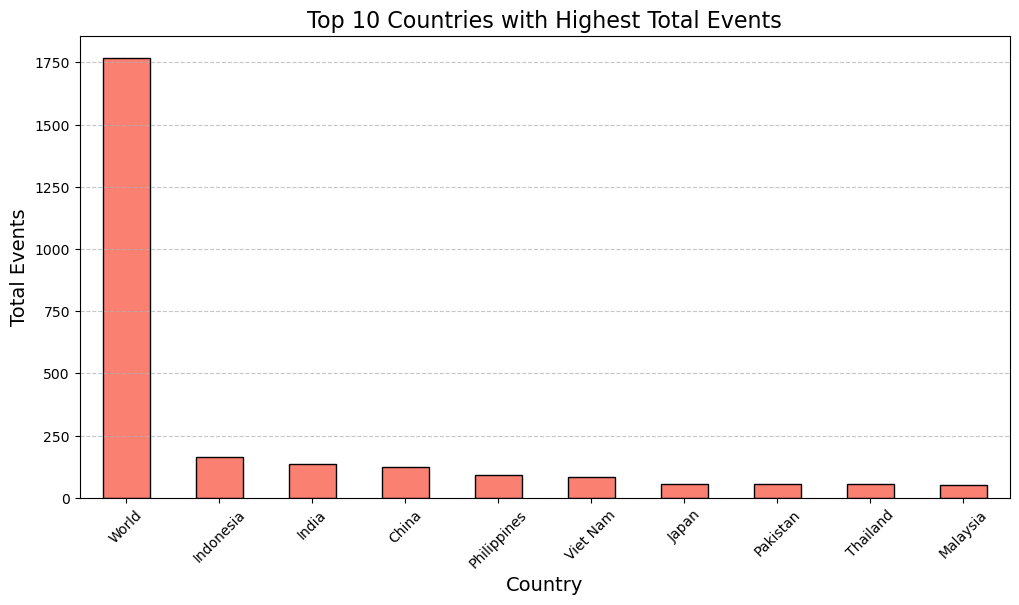

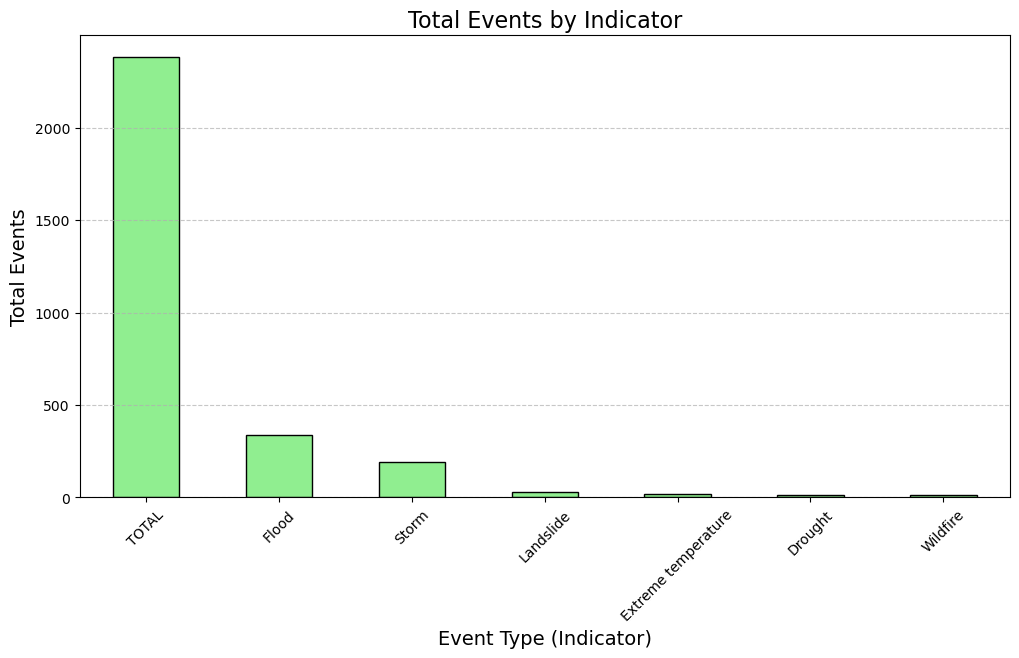

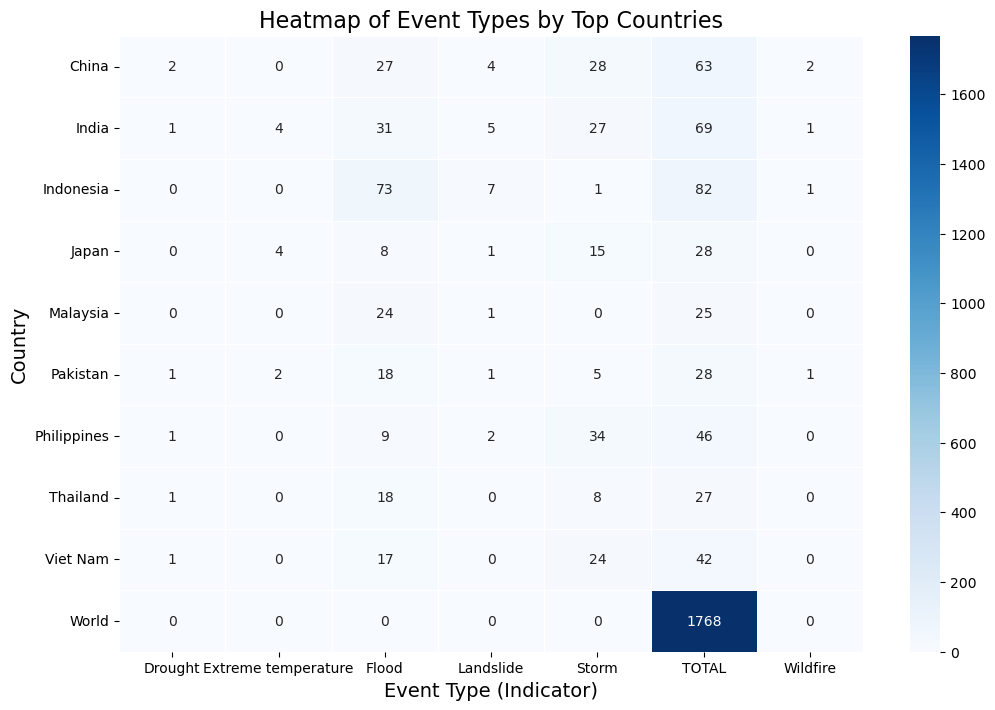

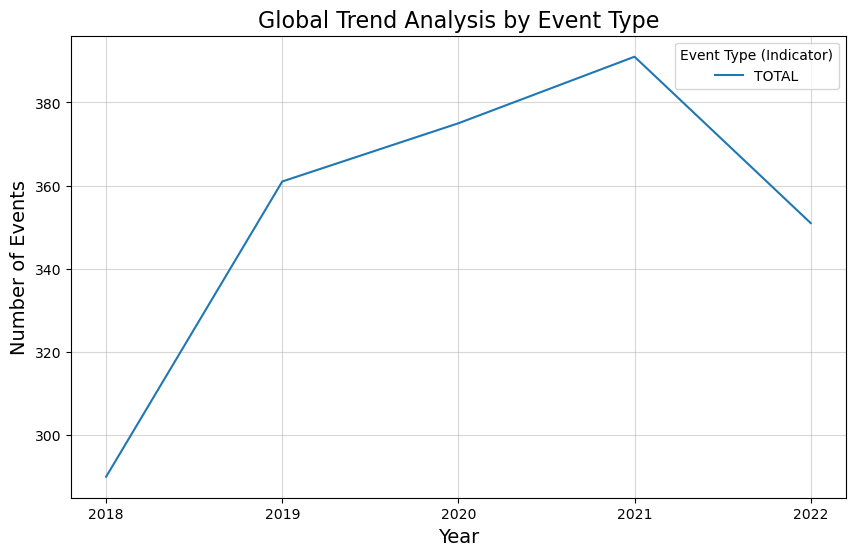

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/preprecessed_data/asian_cdf.csv')

# Total events by year
year_columns = ['2018', '2019', '2020', '2021', '2022']
data['Total_Events'] = data[year_columns].sum(axis=1)
total_events_by_year = data[year_columns].sum()

print("\nTotal Events by Year:")
print(total_events_by_year)

# Visualize total events by year
plt.figure(figsize=(10, 6))
total_events_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Events by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Events", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Top 10 countries with the highest total events
country_events = data.groupby('Country')['Total_Events'].sum().sort_values(ascending=False)
top_countries = country_events.head(10)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Top 10 Countries with Highest Total Events", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Total Events", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Event type analysis
indicator_events = data.groupby('Indicator')['Total_Events'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
indicator_events.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Total Events by Indicator", fontsize=16)
plt.xlabel("Event Type (Indicator)", fontsize=14)
plt.ylabel("Total Events", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Heatmap of events per year for top countries
top_country_data = data[data['Country'].isin(top_countries.index)]
pivot_table = top_country_data.pivot_table(values='Total_Events', index='Country', columns='Indicator', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt=".0f", linewidths=.5)
plt.title("Heatmap of Event Types by Top Countries", fontsize=16)
plt.ylabel("Country", fontsize=14)
plt.xlabel("Event Type (Indicator)", fontsize=14)
plt.show()

# Trend analysis for global data (World)
world_data = data[data['Country'] == 'World']

plt.figure(figsize=(10, 6))
for indicator in world_data['Indicator'].unique():
    subset = world_data[world_data['Indicator'] == indicator]
    plt.plot(year_columns, subset[year_columns].values.flatten(), label=indicator)

plt.title("Global Trend Analysis by Event Type", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Events", fontsize=14)
plt.legend(title="Event Type (Indicator)")
plt.grid(alpha=0.5)
plt.show()


# EDA

In [10]:
cdf = pd.read_csv('../data/preprecessed_data/asian_cdf.csv')
cdf

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022
0,Armenia,ARM,Drought,Number of,0.0,0.0,0.0,0.0,0.0
1,Armenia,ARM,Extreme temperature,Number of,0.0,0.0,0.0,0.0,0.0
2,Armenia,ARM,Flood,Number of,0.0,0.0,0.0,0.0,0.0
3,Armenia,ARM,Landslide,Number of,0.0,0.0,0.0,0.0,0.0
4,Armenia,ARM,Storm,Number of,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
276,Singapore,SGP,Landslide,Number of,0.0,0.0,0.0,0.0,0.0
277,Singapore,SGP,Storm,Number of,0.0,0.0,0.0,0.0,0.0
278,Singapore,SGP,TOTAL,Number of,0.0,0.0,0.0,0.0,0.0
279,Singapore,SGP,Wildfire,Number of,0.0,0.0,0.0,0.0,0.0


In [11]:
cdf['Indicator'].value_counts()

Indicator
TOTAL                  41
Drought                40
Extreme temperature    40
Flood                  40
Landslide              40
Storm                  40
Wildfire               40
Name: count, dtype: int64

Bộ dữ liệu Land Cover Accounts gồm 7 chỉ số:
* **TOTAL:** 
* **Flood:** 
* **Storm:** 
* **Drought:**
* **Landslide:**
* **Extreme temperature:**
* **Wildfire:**

In [12]:
indicator_data = data[data['Indicator'] != 'TOTAL']
total_data = data[data['Indicator'] == 'TOTAL']

In [13]:
total_data

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022,Total_Events
5,Armenia,ARM,TOTAL,Number of,1.0,1.0,1.0,0.0,0.0,3.0
11,Bangladesh,BGD,TOTAL,Number of,4.0,6.0,2.0,2.0,2.0,16.0
14,Bhutan,BTN,TOTAL,Number of,0.0,0.0,0.0,1.0,0.0,1.0
16,Brunei Darussalam,BRN,TOTAL,Number of,0.0,0.0,0.0,0.0,0.0,0.0
21,Cambodia,KHM,TOTAL,Number of,1.0,1.0,2.0,4.0,2.0,10.0
27,China,CHN,TOTAL,Number of,20.0,13.0,11.0,12.0,7.0,63.0
32,Cyprus,CYP,TOTAL,Number of,0.0,0.0,0.0,1.0,0.0,1.0
37,Georgia,GEO,TOTAL,Number of,1.0,1.0,1.0,1.0,1.0,5.0
43,India,IND,TOTAL,Number of,23.0,12.0,11.0,16.0,7.0,69.0
49,Indonesia,IDN,TOTAL,Number of,8.0,14.0,26.0,21.0,13.0,82.0


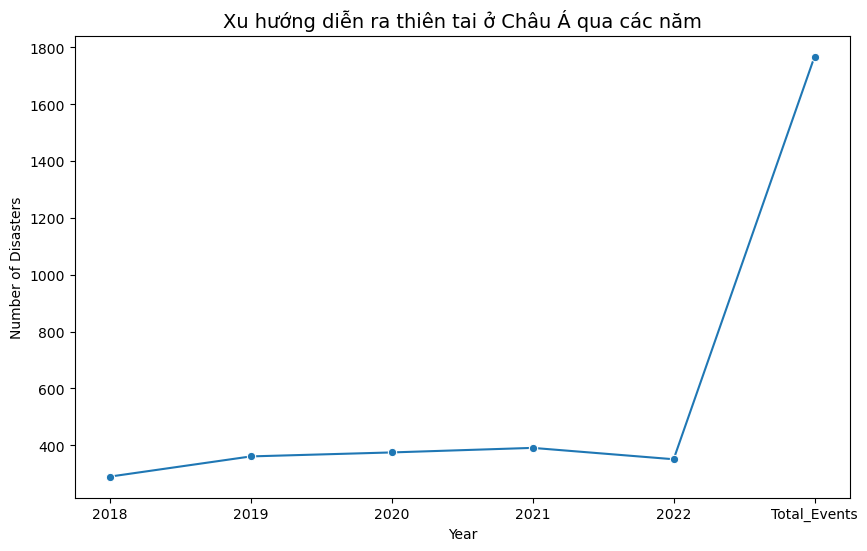

In [14]:
# Thống kê xu hướng tổng số thiên tai ở châu á qua các năm
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_data.columns[4:], y=total_data.loc[total_data['ISO3'] == 'WLD'].iloc[0, 4:].values, marker='o')
plt.title('Xu hướng diễn ra thiên tai ở Châu Á qua các năm', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.show()

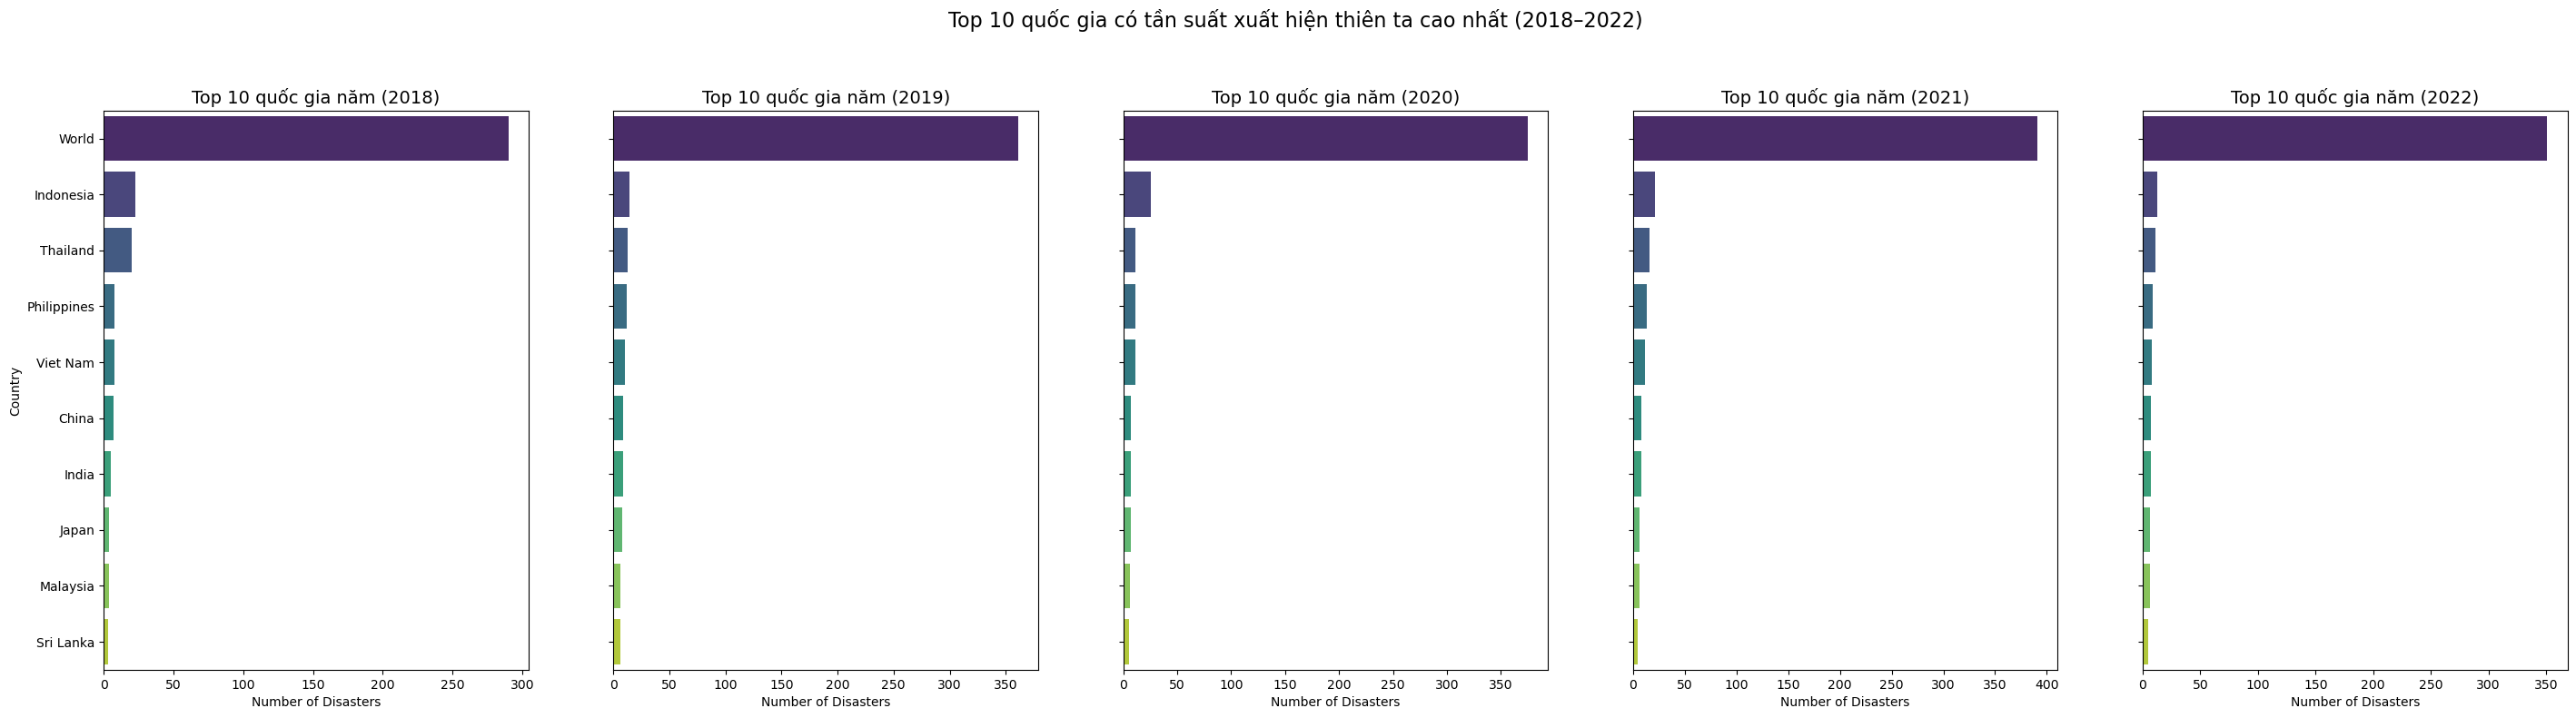

In [15]:
# tần xuất thiên tai theo quốc gia
country_totals = total_data.groupby('Country').sum().reset_index()

years = ['2018', '2019', '2020', '2021', '2022']
top_10_per_year = {
    year: country_totals.nlargest(10, year) for year in years
}

fig, axes = plt.subplots(1, 5, figsize=(35, 8), sharey=True)
plt.subplots_adjust(wspace=0.2)

for i, year in enumerate(years):
    sns.barplot(
        data=top_10_per_year[year],
        x=year, y='Country',
        palette='viridis',
        ax=axes[i]
    )
    axes[i].set_title(f'Top 10 quốc gia năm ({year})', fontsize=14)
    axes[i].set_xlabel('Number of Disasters')
    if i == 0: 
        axes[i].set_ylabel('Country')
    else:
        axes[i].set_ylabel('')

fig.suptitle('Top 10 quốc gia có tần suất xuất hiện thiên ta cao nhất (2018–2022)', fontsize=16, y=1.02)

plt.show()


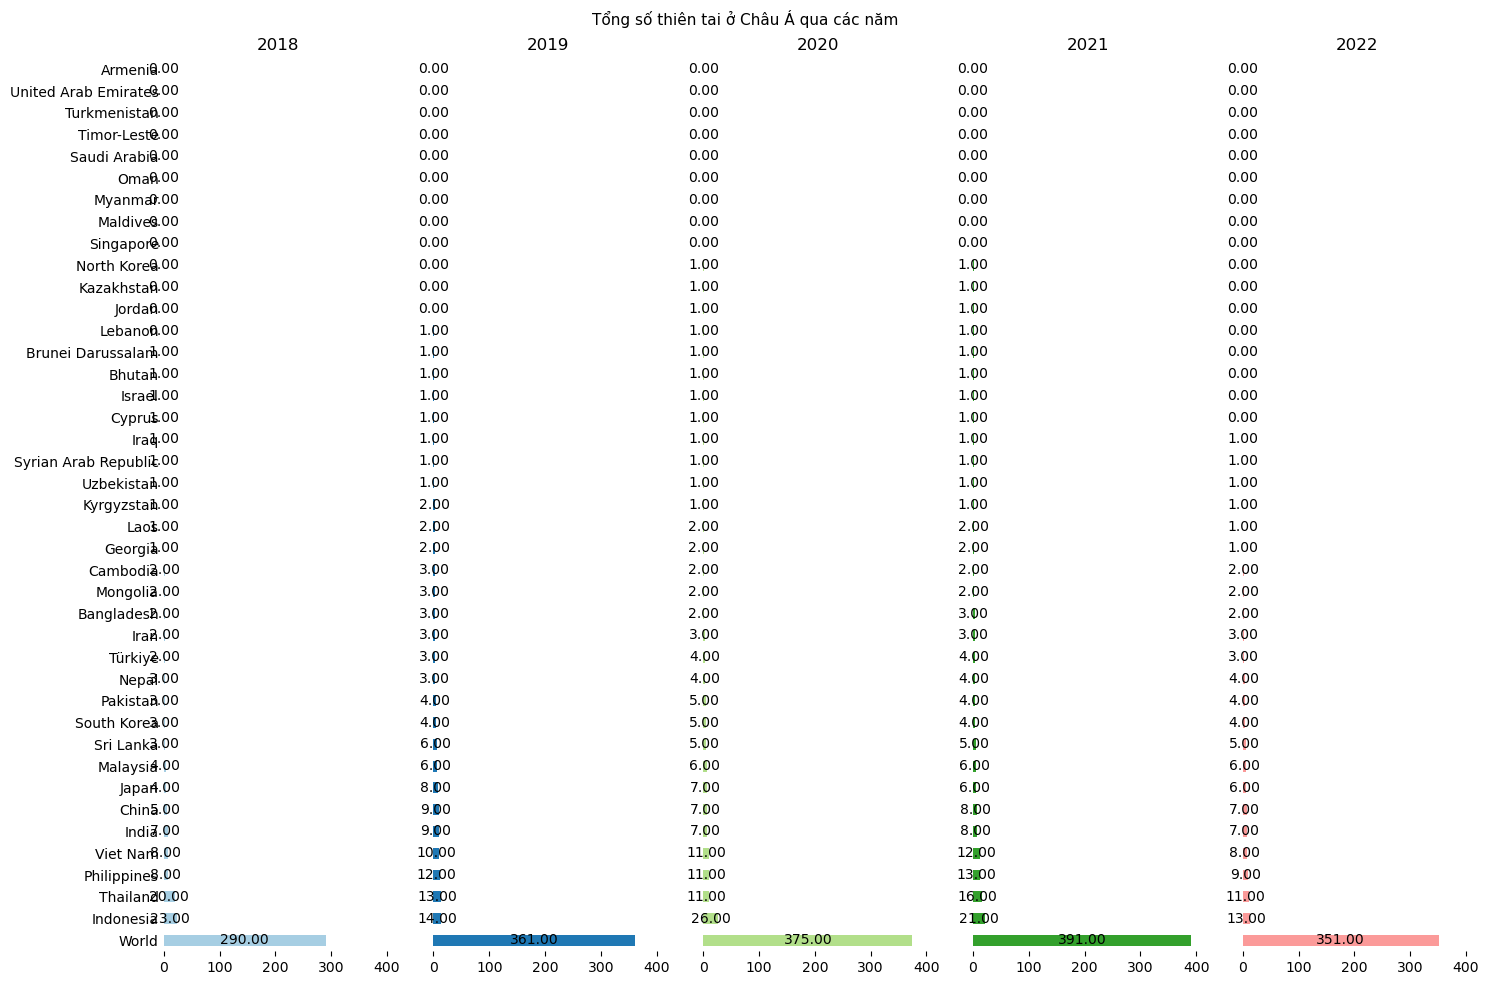

In [16]:
title = 'Tổng số thiên tai ở Châu Á qua các năm'
visualize_change_panel_bar_plot(total_data, title)